Question 2:

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)
Task:
• Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
• Use backpropagation to optimize the model's weights based on error calculation.
• Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
• Evaluate the model on a test set using accuracy and plot the loss over epochs.

Importing all required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

Load dataset and filter necessary columns

In [ ]:
df = pd.read_csv('/content/sample_data/Tweets.csv')
df = df[['airline_sentiment', 'text']]

Display the first few rows of the dataset

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


Display basic information about the dataset

In [ ]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB
None


Check For Missing Values

In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
airline_sentiment    0
text                 0
dtype: int64


<ipython-input-109-f4f5cabf5ccd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='viridis')


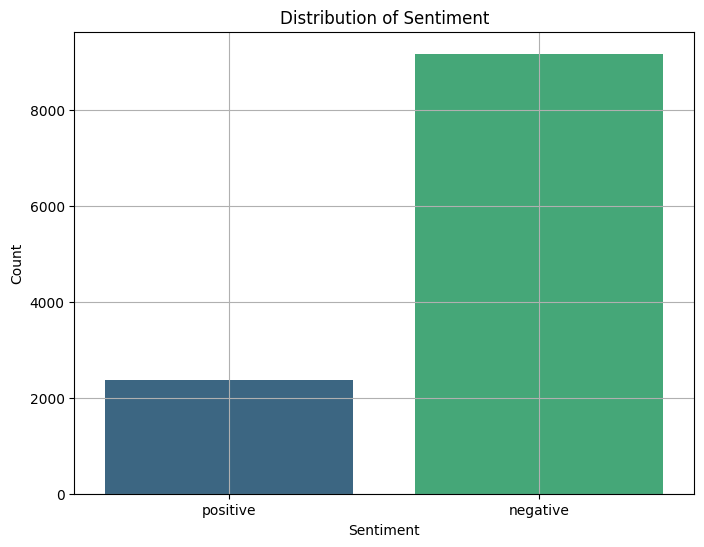

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Filter out only positive and negative sentiments for binary classification

In [ ]:
df = df[df['airline_sentiment'] != 'neutral']

Map sentiment to binary

In [ ]:
df['sentiment'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

<ipython-input-95-22a395ab7579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})


Split the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

Convert text to TF-IDF features

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Function to train and visualize MLP with different activation functions

In [ ]:
def train_and_evaluate(activation_function):
    mlp = MLPClassifier(hidden_layer_sizes=(10,), activation=activation_function, max_iter=1000, random_state=42)
    mlp.fit(X_train_tfidf, y_train)

    y_pred = mlp.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Activation: {activation_function}')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy * 100:.2f}%')

    plt.plot(mlp.loss_curve_, label=f'Loss - {activation_function}')

    return accuracy, mlp.loss_curve_


Train and evaluate for ReLU, Sigmoid, and Tanh

In [ ]:
accuracies = {}
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

ReLu Activation

Activation: relu
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1862
           1       0.72      0.75      0.73       447

    accuracy                           0.89      2309
   macro avg       0.83      0.84      0.83      2309
weighted avg       0.90      0.89      0.89      2309

Accuracy: 89.39%


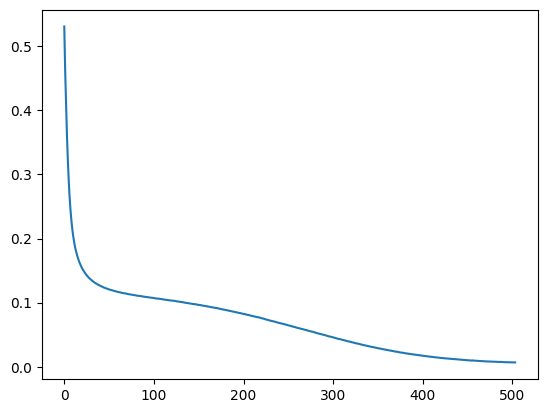

In [ ]:
accuracy_relu, loss_relu = train_and_evaluate('relu')
accuracies['ReLU'] = accuracy_relu

Sigmoid activation

Activation: logistic
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1862
           1       0.75      0.74      0.75       447

    accuracy                           0.90      2309
   macro avg       0.85      0.84      0.84      2309
weighted avg       0.90      0.90      0.90      2309

Accuracy: 90.34%


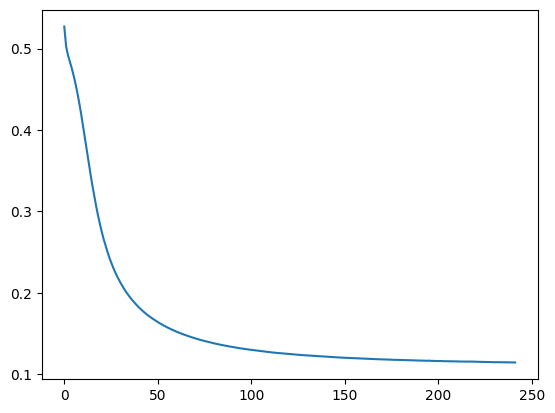

In [ ]:
accuracy_sigmoid, loss_sigmoid = train_and_evaluate('logistic')
accuracies['Sigmoid'] = accuracy_sigmoid

Tanh activation

Activation: tanh
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1862
           1       0.73      0.75      0.74       447

    accuracy                           0.90      2309
   macro avg       0.83      0.84      0.84      2309
weighted avg       0.90      0.90      0.90      2309

Accuracy: 89.78%


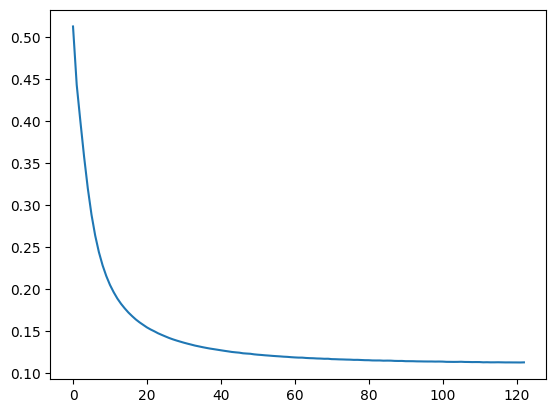

In [ ]:
accuracy_tanh, loss_tanh = train_and_evaluate('tanh')
accuracies['Tanh'] = accuracy_tanh

Accuracy comparison bar chart

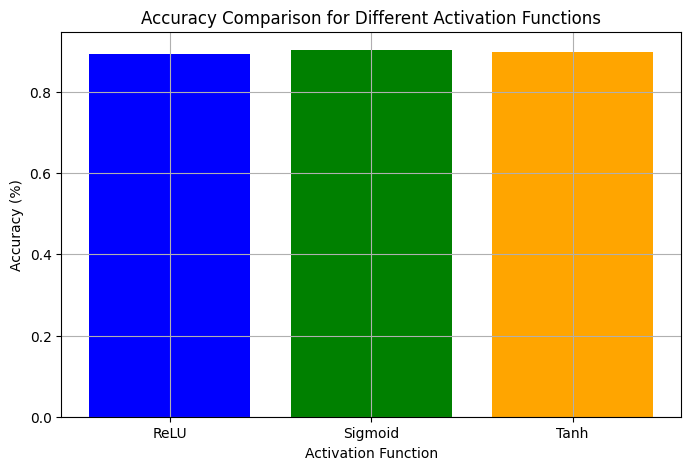

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison for Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()